# Градиентный бустинг для Классификации

В текущем ДЗ Вам предстоит ознакомиться и попрактиковаться с реализацией градиентного бустинга на примере

## Создадим искусственный сет для классификации

In [ ]:
from sklearn.datasets import make_classification

import numpy as np

In [ ]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1, weights = [0.3])
# summarize the dataset
print(X.shape, y.shape)

(1000, 10) (1000,)


## Задание 0. (0.5 балла)
Оцените количество уникальных классов в выборки и их количество. Ответ выведите ниже. Является ли выборка сбалансированной?

In [ ]:
np.unique(y)

array([0, 1])

В сгенерированной выборке 2 класса.

In [ ]:
n_cls0 = np.where(y == 0)[0].shape[0]
n_cls0

302

В классе 0 - 302 экземпляров.

In [ ]:
n_cls1 = np.where(y == 1)[0].shape[0]
n_cls1

698

В классе 1 - 698 экземпляров.

In [ ]:
n_cls1 / n_cls0

2.3112582781456954

Выборка несбалансированная, количество экземпляров класса 1 в 2.3 раза превышает количество экземпляров класса 0.

### Задание 1. (1 балл)
1. Выполните кросс-валидацию со стратификацией.

Для этого сперва необходимо инициализировать метод RepeatedStratifiedKFold со следующими параметрами: n_splits=10, n_repeats=3, random_state=1. 

Затем инициализировать метод cross_val_score (сохраните его в переменную n_scores), передать в него вашу модель, X, y и cv=cv, где cv это инициализированный ранее RepeatedStratifiedKFold. Также укажите n_jobs = -1 и error_score='raise'.

In [ ]:
# gradient boosting for classification in scikit-learn
from numpy import mean
from numpy import std

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model = GradientBoostingClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.918 (0.028)


### Задание 2. (6 заданий по 0,5 балла)
1. Разделите ваш датасет (X,y) на тренировочную и тестовые выборки c test_size=0.2, random_state=1.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

2. Инициализируйте модель GradientBoostingClassifier

In [ ]:
model = GradientBoostingClassifier()

3. Обучите модель при помощи метода fit() на тренировочных данных (пока не указывайте дополнительных настроек модели, передайте в метод только X_train, y_train)

In [ ]:
model.fit(X_train, y_train)

GradientBoostingClassifier()

4. Сделайте предсказания при помощи метода predict на тестовом наборе данных и сохраните предсказания в переменную y_predicted

In [ ]:
y_predicted = model.predict(X_test)

5. При помощи метода confusion_matrix из sklearn выведите матрицу ошибок алгоритма на тестовом наборе данных (между y_test и y_predicted). Можете (по желанию) ее визуализировать при помощи библиотеки seaborn - сиборн удобен для визуализации матриц ошибок.

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80        58
           1       0.91      0.94      0.92       142

    accuracy                           0.89       200
   macro avg       0.87      0.86      0.86       200
weighted avg       0.89      0.89      0.89       200



In [ ]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[ 45,  13],
       [  9, 133]])

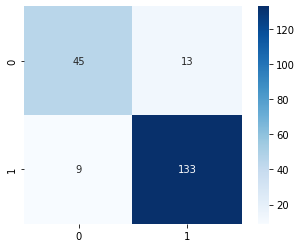

In [ ]:
sns.heatmap(cm, square=True, annot=True, fmt='d', cmap='Blues')
plt.show()

6. Посчитайте метрику ROC AUC и F1 score на тестовом наборе данных (между y_test и y_predicted)

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [ ]:
roc_auc_score(y_test, y_predicted)

0.8562408936376881

In [ ]:
f1_score(y_test, y_predicted)

0.9236111111111112

## Задание 3 (3 балла)

До этого мы пользовались с Вами методом "из коробки". Это не есть хорошо, поэтому поиграйте с настройками гиперпараметров алгоритма (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html), чтобы улучшить вид confusion matrix, а также roc_auc_score и f1_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

Для подбора гиперпараметров воспользуемся GridSearchCV.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
clf = GradientBoostingClassifier(loss='exponential', random_state=1, warm_start=True)

Подбор будем осуществлять среди следующих параметров и их значений:

In [ ]:
param = {
    'learning_rate': [0.1, 0.5, 0.7, 0.8],
    'n_estimators': [100, 150, 250],
    'max_depth': [3, 5, 7, 10, 12, 20],
    'max_features': ['log2', 'sqrt'],
    'min_samples_leaf': [1, 3, 5]
}

In [ ]:
grid = GridSearchCV(
    clf, 
    param, 
    cv=cv, 
    n_jobs=-1,
    scoring='roc_auc'
)

grid.fit(X_train, y_train)
print(grid.best_params_)
model2 = grid.best_estimator_

{'learning_rate': 0.1, 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 3, 'n_estimators': 250}


Расчет показал, что лучший показатель у данного набора параметров.
Обучим модель с ними и вычислим метрики:

In [ ]:
n_scores2 = cross_val_score(model2, X, y, cv=cv, n_jobs=-1, error_score='raise')
model2.fit(X_train, y_train)
y_predicted2 = model2.predict(X_test)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (mean(n_scores2), std(n_scores2)), '\n')
print('ROC-AUC:', roc_auc_score(y_test, y_predicted2), '\n')
print(classification_report(y_test, y_predicted2))
cm2 = confusion_matrix(y_test, y_predicted2)
sns.heatmap(cm2, square=True, annot=True, fmt='d', cmap='Blues')
plt.show()

Как видим, удалось улучшить модель.